In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-11-03 10:21:38.081865


# Luottokorttipetokset

Data löytyy lähteestä: https://www.kaggle.com/mlg-ulb/creditcardfraud

Datassa ei ole alkuperäisiä selittäviä muuttujia, vaan niistä pääkomponenttianalyysilla muodostetut uudet muuttujat. Class-muuttuja on selitettävä/ennustettava muuttuja (0 = 'ei petos', 1 = 'petos').

Petoksia on vähän suhteessa kaikkiin luottokorttitapahtumiin. Tämän vuoksi data on syytä tasapainottaa.

Huomautus! Mukana on useita funktioita (sample, train_test_split sekä käytetyt mallit), joille voisin antaa random_state-parametrille kiinteän arvon. Koska en ole antanut kiinteää arvoa, niin eri suorituskerroilla saan toisistaan poikkeavia tuloksia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split osaa jakaa datan opetusdataan ja testidataan
from sklearn.model_selection import train_test_split

# Käytettävät mallit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Mallien hyvyyden arviointiin
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [3]:
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Selitettävän/ennustettavan muuttujan jakauma on epätasapainoinen.

Tasapainotetaan data ottamalla mukaan vain 738 (1.5 * 492) henkilön satunnaisotos isommasta ryhmästä.

In [5]:
df_tasap = df[df['Class']==1].append(df[df['Class']==0].sample(738), ignore_index = True)
df_tasap['Class'].value_counts()

0    738
1    492
Name: Class, dtype: int64

In [6]:
# Selittävät muuttujat
X = df_tasap.drop('Class', axis = 1)

# Selitettävä/ennustettava muuttuja
y = df_tasap['Class']

In [7]:
# Jako opetus- ja testidataan
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Mallien sovitus

malli1 = LogisticRegression()
malli1.fit(X_train, y_train)

malli2 = DecisionTreeClassifier(max_depth = 2)
malli2.fit(X_train, y_train)

malli3 = RandomForestClassifier(max_depth = 2)
malli3.fit(X_train, y_train)

malli4 = GradientBoostingClassifier(max_depth = 2)
malli4.fit(X_train, y_train)


# Mallien antamat ennusteet opetus- ja testidatalle

y_train_malli1 = malli1.predict(X_train)
y_test_malli1 = malli1.predict(X_test)

y_train_malli2 = malli2.predict(X_train)
y_test_malli2 = malli2.predict(X_test)

y_train_malli3 = malli3.predict(X_train)
y_test_malli3 = malli3.predict(X_test)

y_train_malli4 = malli4.predict(X_train)
y_test_malli4 = malli4.predict(X_test)

C:\Users\taaak\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Ennustetarkkuudet opetusdatalle

print('Logistinen regressio', accuracy_score(y_train, y_train_malli1))
print('Päätöspuu', accuracy_score(y_train, y_train_malli2))
print('Satunnaismetsä', accuracy_score(y_train, y_train_malli3))
print('GradienBoosting', accuracy_score(y_train, y_train_malli4))

Logistinen regressio 0.9533622559652929
Päätöspuu 0.9392624728850325
Satunnaismetsä 0.9360086767895879
GradienBoosting 0.9859002169197397


In [10]:
# Ennustetarkkuudet testidatalle

print('Logistinen regressio', accuracy_score(y_test, y_test_malli1))
print('Päätöspuu', accuracy_score(y_test, y_test_malli2))
print('Satunnaismetsä', accuracy_score(y_test, y_test_malli3))
print('GradienBoosting', accuracy_score(y_test, y_test_malli4))

Logistinen regressio 0.948051948051948
Päätöspuu 0.9415584415584416
Satunnaismetsä 0.9448051948051948
GradienBoosting 0.9545454545454546


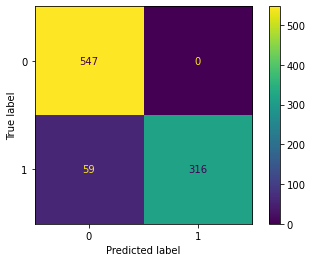

In [11]:
# Confusion-matriisi opetusdatalle (Satunnaismetsä)
plot_confusion_matrix(malli3, X_train, y_train)

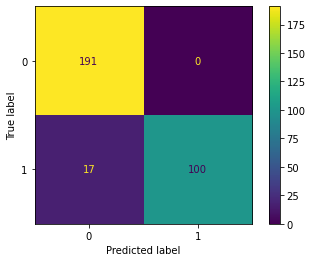

In [12]:
# Confusion-matriisi testidatalle (Satunnaismetsä)
plot_confusion_matrix(malli3, X_test, y_test)

In [13]:
# Luokitteluraportti testidatalle (Satunnaismetsä)
print(classification_report(y_test, y_test_malli3))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       191
           1       1.00      0.85      0.92       117

    accuracy                           0.94       308
   macro avg       0.96      0.93      0.94       308
weighted avg       0.95      0.94      0.94       308



In [14]:
# Tarkastellaan mallin toimivuutta alkuperäisessä datassa

X_all = df.drop('Class', axis=1)

y_all = df['Class']

In [15]:
# Satunnaismetsän ennusteet
y_all_malli3 = malli3.predict(X_all)

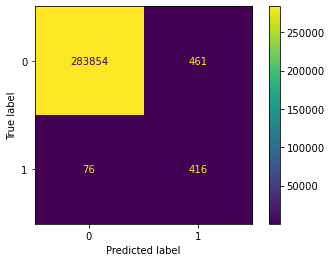

In [16]:
# Confusion-matriisi (Satunnaismetsä)
plot_confusion_matrix(malli3, X_all, y_all)

In [18]:
# Luokitteluraportti (Satunnaismetsä)
print(classification_report(y_all, y_all_malli3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.47      0.85      0.61       492

    accuracy                           1.00    284807
   macro avg       0.74      0.92      0.80    284807
weighted avg       1.00      1.00      1.00    284807

